In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report
from plot_cm import plot
from get_true_positif import get_data as gd

In [2]:
root = "../../"

In [3]:
data=pd.read_excel(root+r"data\data_uji\data_ujiX1234.xlsx")
komentar2 = data.komentar_bersih.tolist()
komentar = data.komentar.tolist()
y_true  = data.label.tolist()
data.head()

,Column1,Unnamed: 0,Unnamed: 1,label,komentar,komentar_bersih
0,741.0,741.0,1,non spam,@nurtunggali hanya di @rissa_skincare y say.. ...,nurtunggali risa skin care y nan awas hati 2 o...
1,777.0,777.0,2,non spam,@legitenak hahahaha balajaer mah gitu kadang b...,legitenak nan balajaer mah gitu kadang buta sm...
2,790.0,790.0,3,non spam,"@bundanya.anak.anak lu lah, muka kayak mak la...",badan anak anak lu lah muka kayak mak lampir s...
3,855.0,855.0,4,non spam,"@lazarus_smith1717 anyway parameter kita beda,...",lazarus smith 1717 anyway parameter beda gue o...
4,869.0,869.0,5,non spam,@awukyu iyalah akun bodong yg doyan nyinyir ka...,awukyu iya akun bodong doyan nyinyir kaya lu o...


In [4]:
#load model
path = root+r"Pemodelan/data1/"

In [5]:
pembobotan_imbang_freq = joblib.load(path+"tak_imbang/"+"pembobotan_tf.w")
pembobotan_imbang_bin = joblib.load(path+"tak_imbang/"+"pembobotan_bin.w")

# CNB

In [6]:
cnb_tfidf = joblib.load(path+"tak_imbang/"+"cnb_tfidf.model")
cnb_tf = joblib.load(path+"tak_imbang/"+"cnb_tf.model")
cnb_bin = joblib.load(path+"tak_imbang/"+"cnb_bin.model")

### 1. TFIDF

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)
              precision    recall  f1-score   support

    non spam       0.90      0.97      0.93       726
        spam       0.97      0.89      0.93       725

    accuracy                           0.93      1451
   macro avg       0.93      0.93      0.93      1451
weighted avg       0.93      0.93      0.93      1451




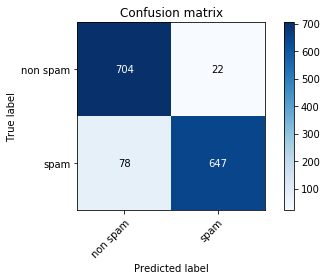

In [22]:
cnb_tfidf.set_params(alpha = 1)
# print(cnb_tfidf)
y_pred = cnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar))
# target_names = list(set(y_true))
print(plot.plot_confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))
print("")

In [23]:
gd.get_data(y_true, y_pred, komentar, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
5525,rp,696
1,000,520
1981,dan,290
2276,dr,249
2111,di,224
6668,wa,181
1467,bisa,175
6828,yang,135
6924,äkü,131
2783,harga,121


AxesSubplot(0.0706597,0.255582;0.723472x0.651362)
              precision    recall  f1-score   support

    non spam       0.99      0.98      0.99       726
        spam       0.98      0.99      0.99       725

    accuracy                           0.99      1451
   macro avg       0.99      0.99      0.99      1451
weighted avg       0.99      0.99      0.99      1451



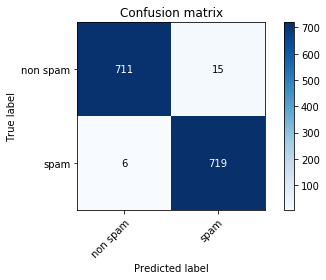

In [24]:
y_pred = cnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar2))
print(plot.plot_confusion_matrix(y_true,y_pred))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
# print(plot.plot_confusion_matrix(y_true,y_pred,target_names ))

In [25]:
gd.get_data(y_true, y_pred, komentar2, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
3391,rp,696
460,aku,662
1731,herbal,392
3202,produk,391
669,banget,280
2102,kasih,259
2056,kakak,259
1316,dr,248
3029,payudara,244
2055,kak,234


In [26]:
# data["prediksi"] = y_pred
# data.to_excel("tambahan_prediksi2.xlsx")

### 2. TF

              precision    recall  f1-score   support

    non spam       0.91      0.95      0.93       726
        spam       0.95      0.90      0.93       725

    accuracy                           0.93      1451
   macro avg       0.93      0.93      0.93      1451
weighted avg       0.93      0.93      0.93      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


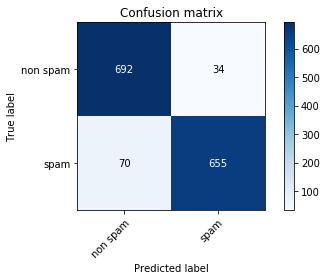

In [27]:
cnb_tf.set_params(alpha = 4)
y_pred = cnb_tf.predict(pembobotan_imbang_freq.transform(komentar))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [28]:
gd.get_data(y_true, y_pred, komentar, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
5665,rp,696
1,000,520
2015,dan,309
2317,dr,249
2147,di,229
6832,wa,182
1491,bisa,178
6994,yang,149
7092,äkü,124
2827,harga,121


              precision    recall  f1-score   support

    non spam       0.99      0.96      0.97       726
        spam       0.96      0.99      0.98       725

    accuracy                           0.98      1451
   macro avg       0.98      0.98      0.98      1451
weighted avg       0.98      0.98      0.98      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


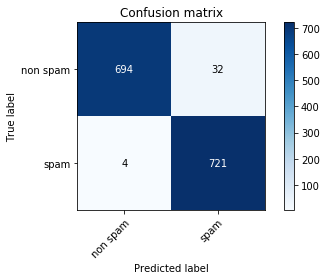

In [29]:
y_pred = cnb_tf.predict(pembobotan_imbang_freq.transform(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [30]:
gd.get_data(y_true, y_pred, komentar2, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
3424,rp,696
460,aku,667
1739,herbal,392
3234,produk,391
669,banget,283
2068,kakak,259
2114,kasih,259
1320,dr,248
3057,payudara,244
2067,kak,235


### 3. Bin 

              precision    recall  f1-score   support

    non spam       0.91      0.95      0.93       726
        spam       0.95      0.90      0.93       725

    accuracy                           0.93      1451
   macro avg       0.93      0.93      0.93      1451
weighted avg       0.93      0.93      0.93      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


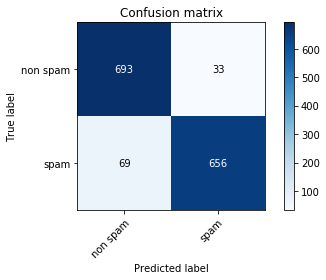

In [31]:
cnb_tf.set_params(alpha = 3.5)
y_pred = cnb_bin.predict(pembobotan_imbang_bin.transform(komentar))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [32]:
gd.get_data(y_true, y_pred, komentar, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
5714,rp,696
1,000,522
2034,dan,314
2341,dr,249
2168,di,229
6886,wa,182
1506,bisa,178
7048,yang,156
7148,äkü,129
2855,harga,121



              precision    recall  f1-score   support

    non spam       1.00      0.96      0.98       726
        spam       0.96      1.00      0.98       725

    accuracy                           0.98      1451
   macro avg       0.98      0.98      0.98      1451
weighted avg       0.98      0.98      0.98      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


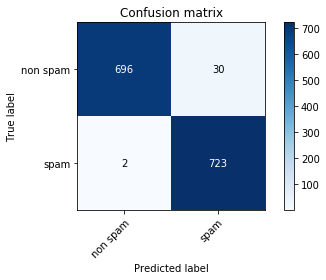

In [33]:

print("")
y_pred = cnb_bin.predict(pembobotan_imbang_bin.transform(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [34]:
gd.get_data(y_true, y_pred, komentar2, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
3458,rp,696
467,aku,667
1757,herbal,392
3264,produk,391
680,banget,283
2089,kakak,259
2135,kasih,259
1335,dr,248
3086,payudara,244
2088,kak,235


# Gaussian

In [35]:
gnb_tfidf = joblib.load(path+"tak_imbang/"+"gnb_tfidf.model")
gnb_tf = joblib.load(path+"tak_imbang/"+"gnb_tf.model")
gnb_bin = joblib.load(path+"tak_imbang/"+"gnb_bin.model")

### 1. TFIDF

              precision    recall  f1-score   support

    non spam       0.80      0.95      0.87       726
        spam       0.94      0.77      0.84       725

    accuracy                           0.86      1451
   macro avg       0.87      0.86      0.86      1451
weighted avg       0.87      0.86      0.86      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


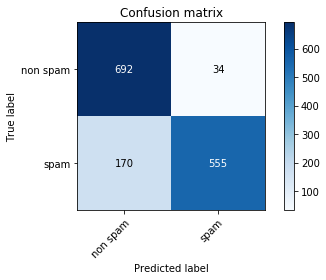

In [36]:
gnb_tfidf.var_smoothing=0.2
y_pred = gnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [37]:
gd.get_data(y_true, y_pred, komentar, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
1160,dr,233
3600,wa,141
3768,äkü,121
1045,dan,114
1568,id,102
1099,di,82
3800,äĸυ,79
1573,ig,70
446,aku,67
1472,herbal,65



              precision    recall  f1-score   support

    non spam       0.91      0.99      0.95       726
        spam       0.99      0.91      0.95       725

    accuracy                           0.95      1451
   macro avg       0.95      0.95      0.95      1451
weighted avg       0.95      0.95      0.95      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


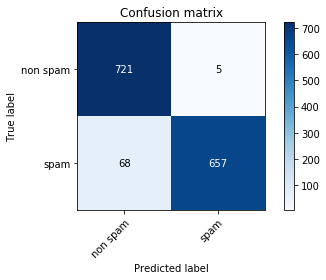

In [38]:
print("")
gnb_tfidf.var_smoothing=0.4
y_pred = gnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar2))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [39]:
gd.get_data(y_true, y_pred, komentar2, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
227,aku,638
1148,herbal,382
2256,produk,362
384,banget,263
1405,kasih,251
2141,payudara,244
849,dr,237
1369,kakak,227
1368,kak,210
2296,putih,207


### 2. TF

              precision    recall  f1-score   support

    non spam       0.75      0.89      0.81       726
        spam       0.86      0.70      0.77       725

    accuracy                           0.80      1451
   macro avg       0.81      0.80      0.79      1451
weighted avg       0.81      0.80      0.79      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


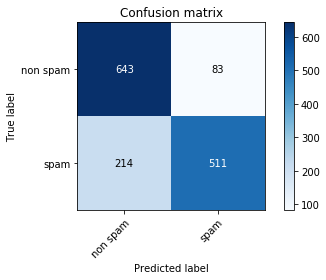

In [40]:
gnb_tf.var_smoothing=0.4
y_pred = gnb_tf.predict(pembobotan_imbang_freq.transform(komentar))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [41]:
gd.get_data(y_true, y_pred, komentar, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
1532,dan,279
1769,dr,208
1633,di,187
1098,bisa,160
5541,wa,156
5658,yang,148
1598,dengan,99
1546,dari,97
2335,id,94
5668,yg,93



              precision    recall  f1-score   support

    non spam       0.97      0.90      0.93       726
        spam       0.90      0.98      0.94       725

    accuracy                           0.94      1451
   macro avg       0.94      0.94      0.94      1451
weighted avg       0.94      0.94      0.94      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


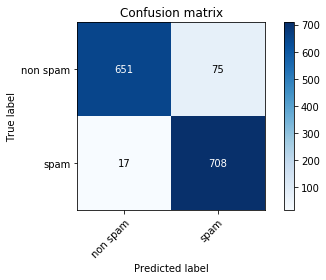

In [42]:
gnb_tf.var_smoothing=0.5
print("")
y_pred = gnb_tf.predict(pembobotan_imbang_freq.transform(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [43]:
gd.get_data(y_true, y_pred, komentar2, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
396,aku,667
1622,herbal,391
3041,produk,383
598,banget,282
1972,kasih,259
1928,kakak,259
1222,dr,246
2876,payudara,244
1927,kak,233
3091,putih,220


### 3. BIN

              precision    recall  f1-score   support

    non spam       0.73      0.92      0.82       726
        spam       0.90      0.66      0.76       725

    accuracy                           0.79      1451
   macro avg       0.82      0.79      0.79      1451
weighted avg       0.82      0.79      0.79      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


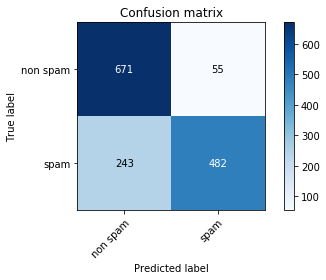

In [44]:
gnb_bin.var_smoothing=0.4
y_pred = gnb_bin.predict(pembobotan_imbang_bin.transform(komentar))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [45]:
gd.get_data(y_true, y_pred, komentar, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
5137,rp,696
1,000,522
1847,dan,308
1974,di,232
1388,bisa,178
6213,wa,169
2134,dr,156
6353,yang,155
2598,harga,121
1937,dengan,118



              precision    recall  f1-score   support

    non spam       1.00      0.88      0.94       726
        spam       0.89      1.00      0.94       725

    accuracy                           0.94      1451
   macro avg       0.95      0.94      0.94      1451
weighted avg       0.95      0.94      0.94      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


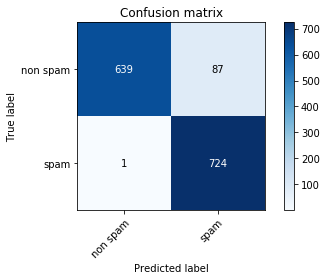

In [46]:
gnb_bin.var_smoothing=0.4
print("")
y_pred = gnb_bin.predict(pembobotan_imbang_bin.transform(komentar2))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

In [47]:
gd.get_data(y_true, y_pred, komentar2, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
3485,rp,696
468,aku,667
1767,herbal,392
3287,produk,391
682,banget,283
2103,kakak,259
2150,kasih,259
1341,dr,248
3109,payudara,244
2102,kak,235


# NBC

In [48]:
nbc_bin = joblib.load(path+"tak_imbang/"+"nbc_bin.model")
nbc_bin.alpha = 11

11
              precision    recall  f1-score   support

    non spam       0.83      0.98      0.90       726
        spam       0.97      0.80      0.88       725

    accuracy                           0.89      1451
   macro avg       0.90      0.89      0.89      1451
weighted avg       0.90      0.89      0.89      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


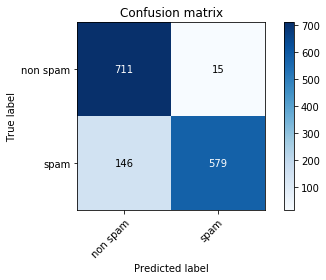

In [51]:
print(nbc_bin.alpha)
y_pred = nbc_bin.predict_(np.array(komentar))
# target_names = list(set(y_true))
print(classification_report(y_true,y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))
# del y_pred

In [52]:
gd.get_data(y_true, y_pred, komentar, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
5204,rp,669
1,000,499
1853,dan,293
1982,di,212
2140,dr,197
6262,wa,178
1384,bisa,166
6409,yang,149
2612,harga,116
2767,id,111


11
              precision    recall  f1-score   support

    non spam       0.83      0.98      0.90       726
        spam       0.97      0.80      0.88       725

    accuracy                           0.89      1451
   macro avg       0.90      0.89      0.89      1451
weighted avg       0.90      0.89      0.89      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


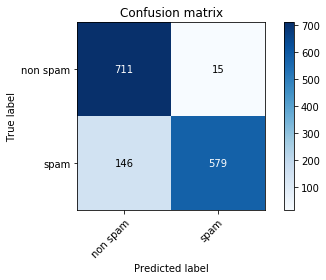

In [54]:
print(nbc_bin.alpha)
y_pred = nbc_bin.predict(np.array(komentar))
# target_names = list(set(y_true))
print(classification_report(y_true,y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))
# del y_pred

In [55]:
gd.get_data(y_true, y_pred, komentar, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
5204,rp,669
1,000,499
1853,dan,293
1982,di,212
2140,dr,197
6262,wa,178
1384,bisa,166
6409,yang,149
2612,harga,116
2767,id,111


              precision    recall  f1-score   support

    non spam       0.98      0.98      0.98       726
        spam       0.98      0.98      0.98       725

    accuracy                           0.98      1451
   macro avg       0.98      0.98      0.98      1451
weighted avg       0.98      0.98      0.98      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


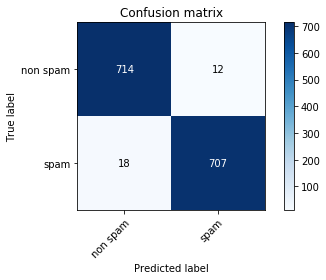

In [56]:
y_pred = nbc_bin.predict_(np.array(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))
# del y_pred

In [57]:
gd.get_data(y_true, y_pred, komentar2, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
414,aku,658
3112,rp,597
1568,herbal,391
2938,produk,388
606,banget,280
1910,kasih,259
1867,kakak,246
2779,payudara,244
1199,dr,243
1866,kak,231


              precision    recall  f1-score   support

    non spam       0.98      0.98      0.98       726
        spam       0.98      0.98      0.98       725

    accuracy                           0.98      1451
   macro avg       0.98      0.98      0.98      1451
weighted avg       0.98      0.98      0.98      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


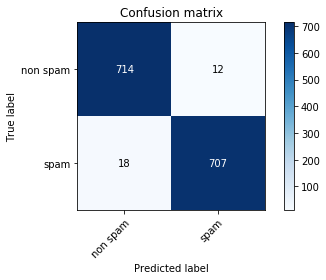

In [58]:
y_pred = nbc_bin.predict(np.array(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))
# del y_pred

In [59]:
gd.get_data(y_true, y_pred, komentar2, class_ = "spam").sort_values("jumlah", axis = 0, ascending = False).head(11)

,fitur,jumlah
414,aku,658
3112,rp,597
1568,herbal,391
2938,produk,388
606,banget,280
1910,kasih,259
1867,kakak,246
2779,payudara,244
1199,dr,243
1866,kak,231
